In [2]:
%run Sellke_SIR.ipynb
from pickle import dump,load
from bokeh.plotting import figure, show
from bokeh.palettes import Colorblind, Turbo256,Cividis256

# Individual simulation testing

In [6]:
m = 1
n = 50
I = [3]*n
I = np.random.exponential(3,n)
Q_unsorted = np.random.exponential(1,n)
Q = np.sort(Q_unsorted)
P = np.random.uniform(0,1,n+m)
p = 0.5
lamb = 0.5

T= 0.0    Z= 33    Final t= 16.4867
T= 1.0    Z= 33    Final t= 17.689
T= 2.0    Z= 33    Final t= 17.537
T= 3.0    Z= 33    Final t= 25.358
T= 4.0    Z= 26    Final t= 16.6865
T= 5.0    Z= 28    Final t= 16.7604
T= 6.0    Z= 28    Final t= 17.6717
T= 7.0    Z= 28    Final t= 13.8879
T= 8.0    Z= 28    Final t= 13.8195
T= 9.0    Z= 29    Final t= 13.9381
T= 10.0    Z= 33    Final t= 18.8259
T= 11.0    Z= 33    Final t= 18.4562
T= 12.0    Z= 33    Final t= 16.4867
T= 13.0    Z= 33    Final t= 16.4867
T= 14.0    Z= 33    Final t= 16.4867
T= 15.0    Z= 33    Final t= 16.4867
T= 16.0    Z= 33    Final t= 16.4867


Text(0, 0.5, 'A')

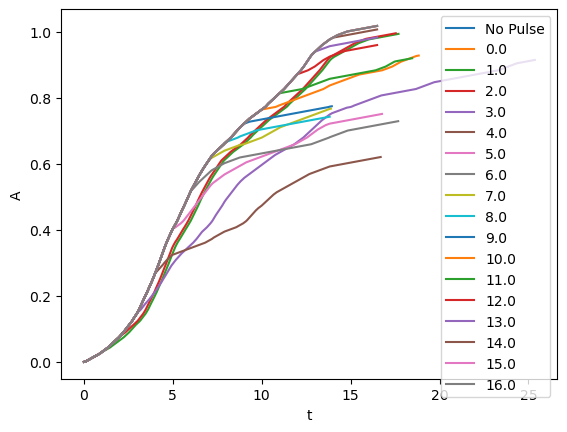

In [81]:
result = SIRSelke_constant_pulse(n,m,Q,I,lamb,100000,P,p)
maxi = result[0][-1]
plt.plot(result[0],result[1],label = "No Pulse")


times = np.arange(0,maxi,1)
p=0.5
maxi = np.inf
T=0
i=0
for T in times:
    result = SIRSelke_constant_pulse(n,m,Q,I,lamb,T,P,p)
    plt.plot(result[0],result[1],label = str(T))
    print("T=",round(T,2),"   Z=", len(result[4]), "   Final t=",round(result[0][-1],4))
plt.legend()
plt.xlabel("t")
plt.ylabel("A")

# Validation against analytic final size distribution

In [156]:
Pn = [0.22313016014842982,0.07812092032156226,0.041851315336848494,0.027046526858429898,0.019516664670509776,0.015179028588497123,0.012480381609877328,0.0107200755796939,0.009543566870151426,0.008756232503306594,0.00824484362089832,0.00794090235588149,0.007802109849281674,0.00780233355634774,0.007926142411960865,0.00816492653175939,0.008515796063325462,0.008978526390125932,0.009556666809744652,0.010254340481022153,0.011077628033144438,0.012030504060036196,0.0131210057295654,0.014340987404124844,0.015705903935287868,0.01717433219559228,0.018774051087102117,0.02041206530124598,0.022117723154696817,0.02374752909751382,0.025302808106481,0.026614168190601695,0.027628233294395177,0.028189711678697493,0.028202781636006535,0.02757347901992907,0.026230748254855718,0.024195172346066662,0.021509382366740354,0.01834233348406908,0.01488707440131759,0.011416065869428893,0.008184708306199315,0.005421732520758719,0.003266153264113607,0.001753437118265113,0.0008156604164100056,0.00031569383558495727,9.532467349553314e-05,1.996496779096263e-05,0]

In [154]:
times = [100]#np.linspace(2,10,5)
full_data = []
for i in range(len(times)):
    data=[]
    T = times[i]


    for i in tqdm(range(100000)):
        I = np.random.exponential(3,n)
        #I = [1]*n
        Q_unsorted = np.random.exponential(1,n)
        Q = np.sort(Q_unsorted)
        result = SIRSelke_constant_pulse(n,m,Q,I,lamb,T,P,p)
        data.append(result[0][-1])
    full_data.append(data)

100%|██████████| 100000/100000 [00:22<00:00, 4395.92it/s]


In [157]:

# Histogram
bins = np.linspace(0, 50, 51)
for i in range(len(times)):
    f = figure(width=670, height=400, toolbar_location=None,
           title="Sellke Construction of SIR model with constant infectivity and infectious period 1")
    hist, edges = np.histogram(full_data[i], density=True, bins=bins)
    f.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
             fill_color="skyblue", line_color="white",
             legend_label="Simulated data")
    f.circle(np.linspace(1.5, 50.5, 50), Pn, size=5, color="red", alpha=1,
             legend_label="Exact Distribution")
    f.x_range = Range1d(0, 50)
    f.y_range = Range1d(0, 0.25)

    show(f)


# Constant infectivity data generation

In [169]:
m = 1
n = 50
p_values = [0,0.5,0.75,0.9,1]
times = np.arange(0.5,4,0.5)
times = np.append(times,np.arange(4,10,1))
times = np.append(times,np.arange(10,22,2))
I = [3]*n
lamb = 0.5

In [70]:
#Generate Q and P data
Q_data = []
P_data = []
for i in tqdm(range(100000)):
    Q_unsorted = np.random.exponential(1,n)
    Q = np.sort(Q_unsorted)
    Q_data.append(Q)
    P = np.random.uniform(0,1,n+m)
    P_data.append(P)
    
filename = "constant_pulse\\q_data.pkl"
with open((filename), 'wb') as f:
    dump(Q_data,f)
filename = "constant_pulse\\p_data.pkl"
with open((filename), 'wb') as f:
    dump(P_data,f)
    

100%|██████████| 100000/100000 [00:00<00:00, 118889.47it/s]


In [171]:

filename = "constant_pulse\\q_data.pkl"
with open((filename), 'rb') as f:
    Q_data = load(f)
filename = "constant_pulse\\p_data.pkl"
with open((filename), 'rb') as f:
    P_data = load(f)

data_t = {p:{T:[] for T in times} for p in p_values}
data_z = {p:{T:[] for T in times} for p in p_values}

for i in tqdm(range(100000)):
    Q = Q_data[i]
    P = P_data[i]
    for p in p_values:
        for T in times:
            result = SIRSelke_constant_pulse(n,m,Q,I,lamb,T,P,p)
            data_t[p][T].append(result[0][-1])
            data_z[p][T].append(len(result[4]))

            
for p in p_values:
    for T in times:

        
        filename = "constant_pulse\\final_times_p=" + format(p,".2f") + "_T="+format(T,".1f") + ".pkl"
        with open((filename), 'wb') as f:
            dump(data_t[p][T],f)
        
        
        filename = "constant_pulse\\final_sizes_p=" + format(p,".2f") + "_T="+format(T,".1f") + ".pkl"
        with open((filename), 'wb') as f:
            dump(data_z[p][T],f)

100%|██████████| 100000/100000 [33:52<00:00, 49.21it/s]


# Data loading

In [173]:
threshold_data = {p:{T:[0]*(n+m+1) for T in times}for p in p_values}
mean_sizes =  {p:{T: 0 for T in times}for p in p_values}
mean_conditional =  {p:{T: 0 for T in times}for p in p_values}
prob_large =  {p:{T: 0 for T in times}for p in p_values}
for p in p_values:
    for T in times:
        filename = "constant_pulse\\final_sizes_p=" + format(p,".2f") + "_T="+str(format(T,".1f")) + ".pkl" 
        with open((filename),"rb") as f:
            final_sizes = load(f)
        mean_sizes[p][T] = np.mean(final_sizes)
        mean_conditional[p][T] = np.mean([ x for x in final_sizes if x>5])
        prob_large[p][T] = len([ x for x in final_sizes if x>5])/len(final_sizes)
        for z in final_sizes:
            for i in range(z+1):
                threshold_data[p][T][i] +=1

In [39]:
f = figure(title="Multiple line example", x_axis_label='x', y_axis_label='y',width=1400, height=800)
x = np.arange(0,n+m+1,1)
k = 0
color_indices = np.linspace(0,len(Cividis256)-1,len(times))
color_indices = [np.floor(x) for x in color_indices]
colors = [Cividis256[int(i)] for i in color_indices]
for T in times:
    f.line(x, threshold_data[T], legend_label=str(round(T,1)),color = colors[k], line_width=2)
    k+=1

show(f)

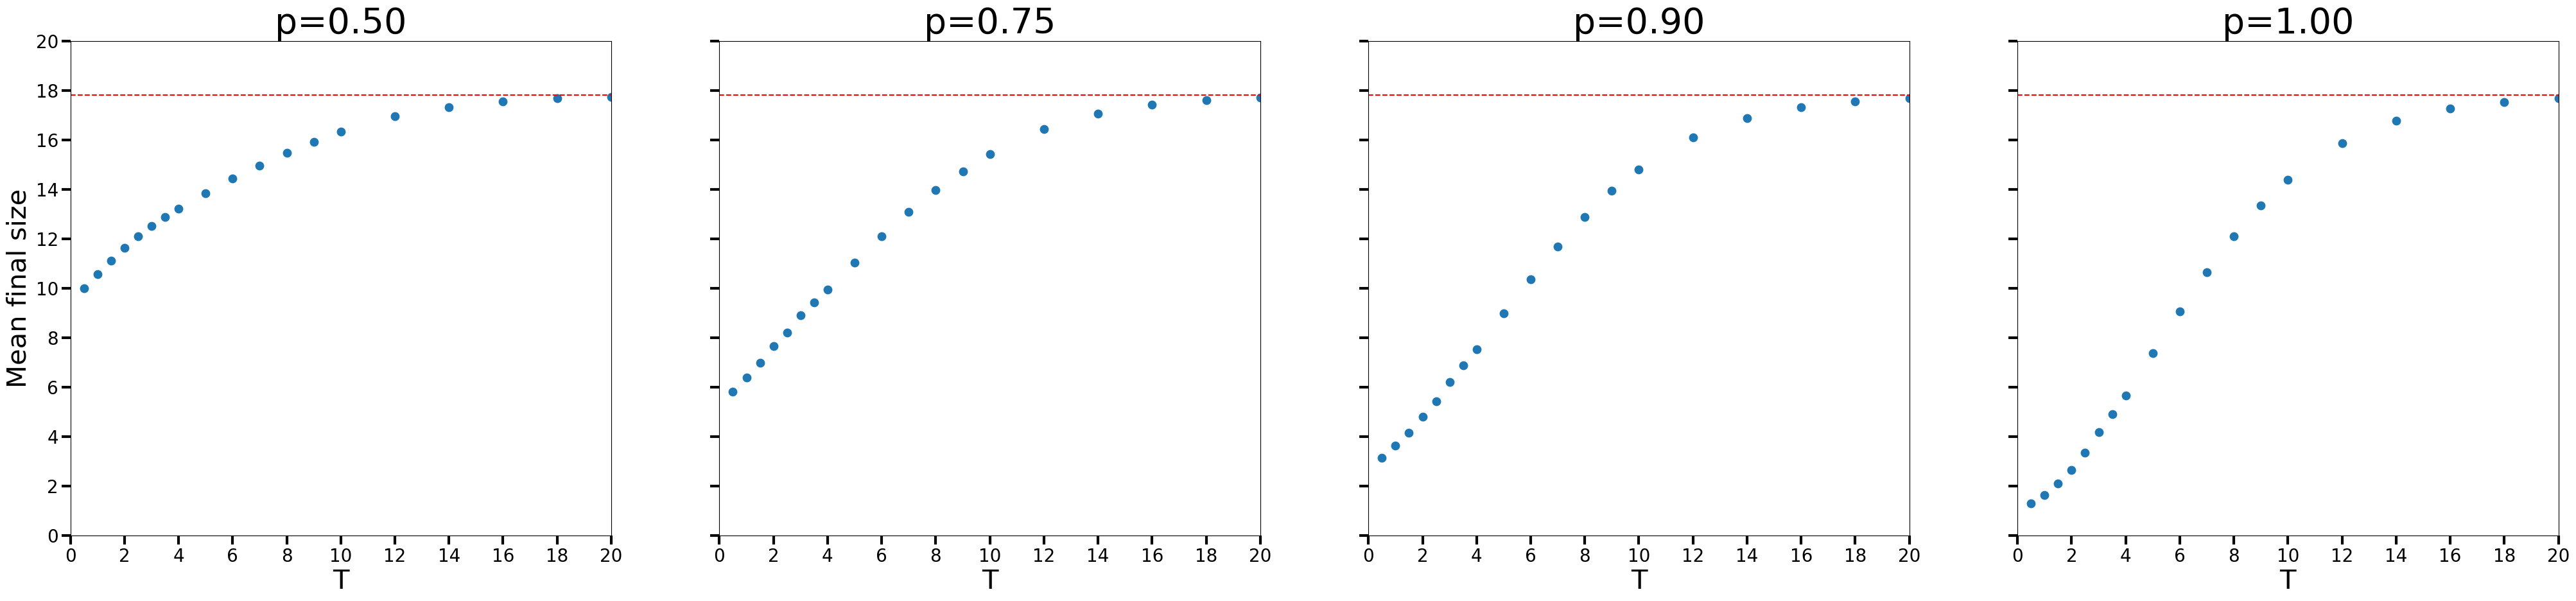

In [179]:
fig, axs = plt.subplots(1,len(p_values)-1, figsize = (50,10), sharex = True, sharey = True)
fig.suptitle('')
i = 0
for p in p_values[1:]:
    axs[i].scatter(times,mean_sizes[p].values(),s=80) 
    axs[i].axhline(list(mean_sizes[0].values())[0], c = "r", linestyle = "--")
    axs[i].set_title("p=" + format(p,".2f"), fontsize = 40)
    axs[i].set_xlim(0,20)
    axs[i].set_xticks(np.linspace(0,20,11))
    axs[i].set_xticklabels([format(x,".0f") for x in np.linspace(0,20,11)],fontsize = 20)
    axs[i].set_yticks(np.linspace(0,20,11))
    axs[i].set_yticklabels([format(x,".0f") for x in np.linspace(0,20,11)],fontsize = 20)
    axs[i].tick_params(axis= "both", width = 3, size =10)
    axs[i].set_xlabel("T",fontsize = 30)
    i+=1

axs[0].set_ylabel("Mean final size",fontsize = 30)
fig.savefig("outputs\\outbreak_size.png")

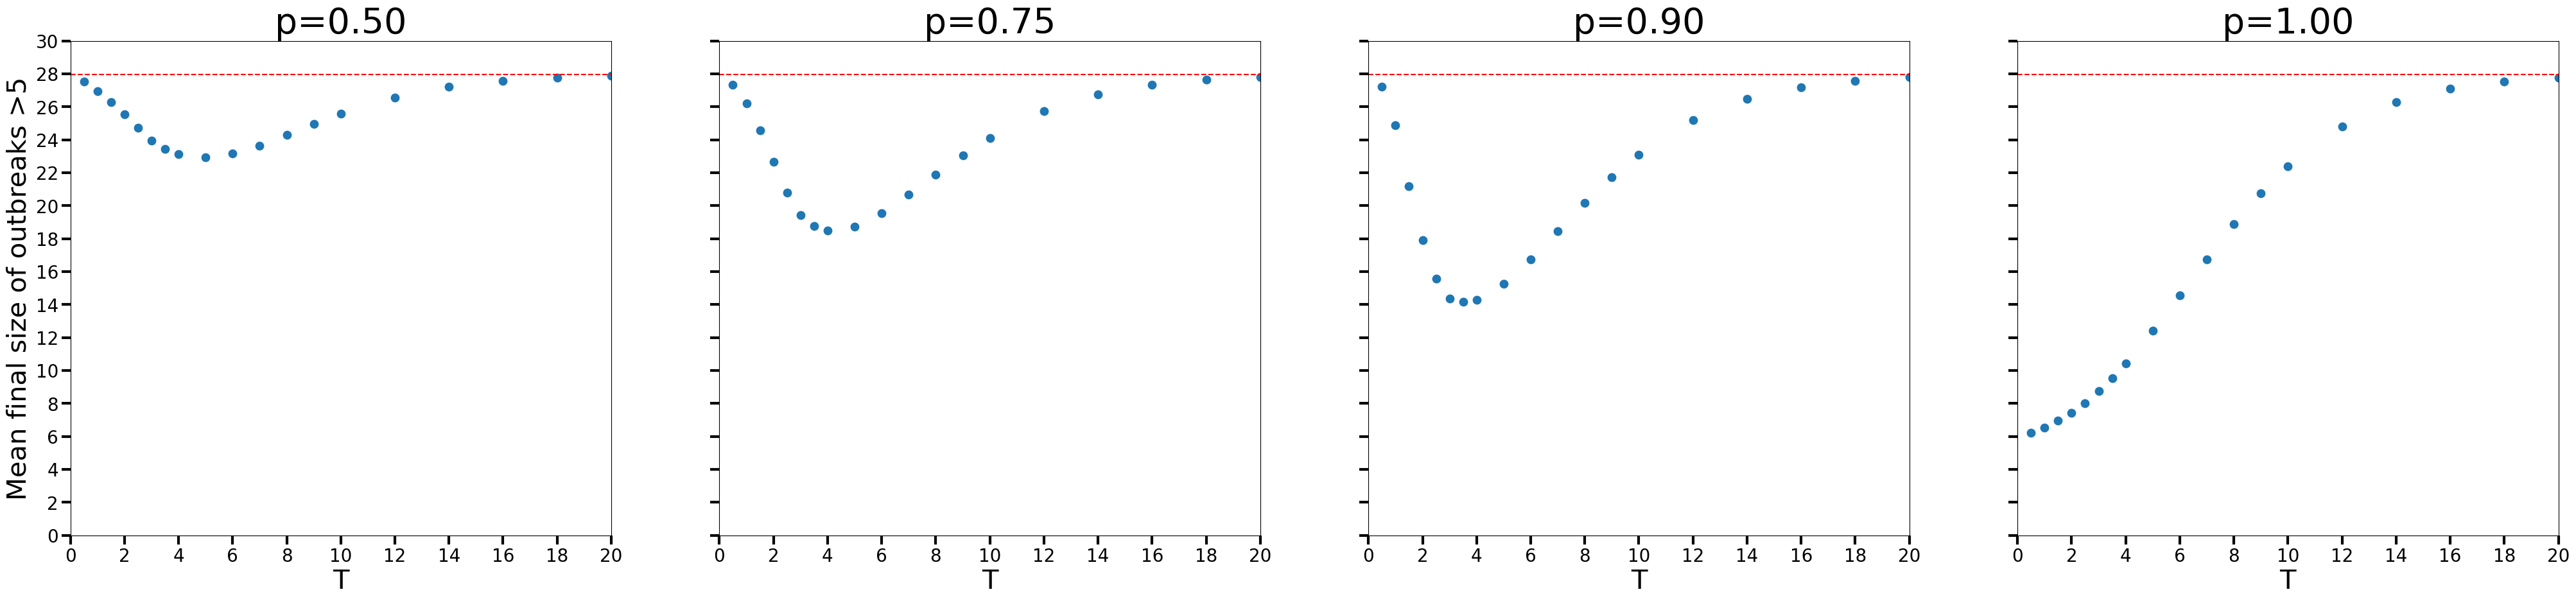

In [180]:
fig, axs = plt.subplots(1,len(p_values)-1, figsize = (50,10), sharex = True, sharey = True)
fig.suptitle('')
i = 0
for p in p_values[1:]:
    axs[i].scatter(times,mean_conditional[p].values(),s = 80) 
    axs[i].axhline(list(mean_conditional[0].values())[0], c = "r", linestyle = "--")
    axs[i].set_title("p=" + format(p,".2f"), fontsize = 40)
    axs[i].set_xlim(0,20)
    axs[i].set_xticks(np.linspace(0,20,11))
    axs[i].set_xticklabels([format(x,".0f") for x in np.linspace(0,20,11)],fontsize = 20)
    axs[i].set_yticks(np.linspace(0,30,16))
    axs[i].set_yticklabels([format(x,".0f") for x in np.linspace(0,30,16)],fontsize = 20)
    axs[i].tick_params(axis= "both", width = 3, size =10)
    axs[i].set_xlabel("T",fontsize = 30)
    i+=1

axs[0].set_ylabel("Mean final size of outbreaks >5",fontsize = 30)
fig.savefig("outputs\\condition_outbreak_size.png")

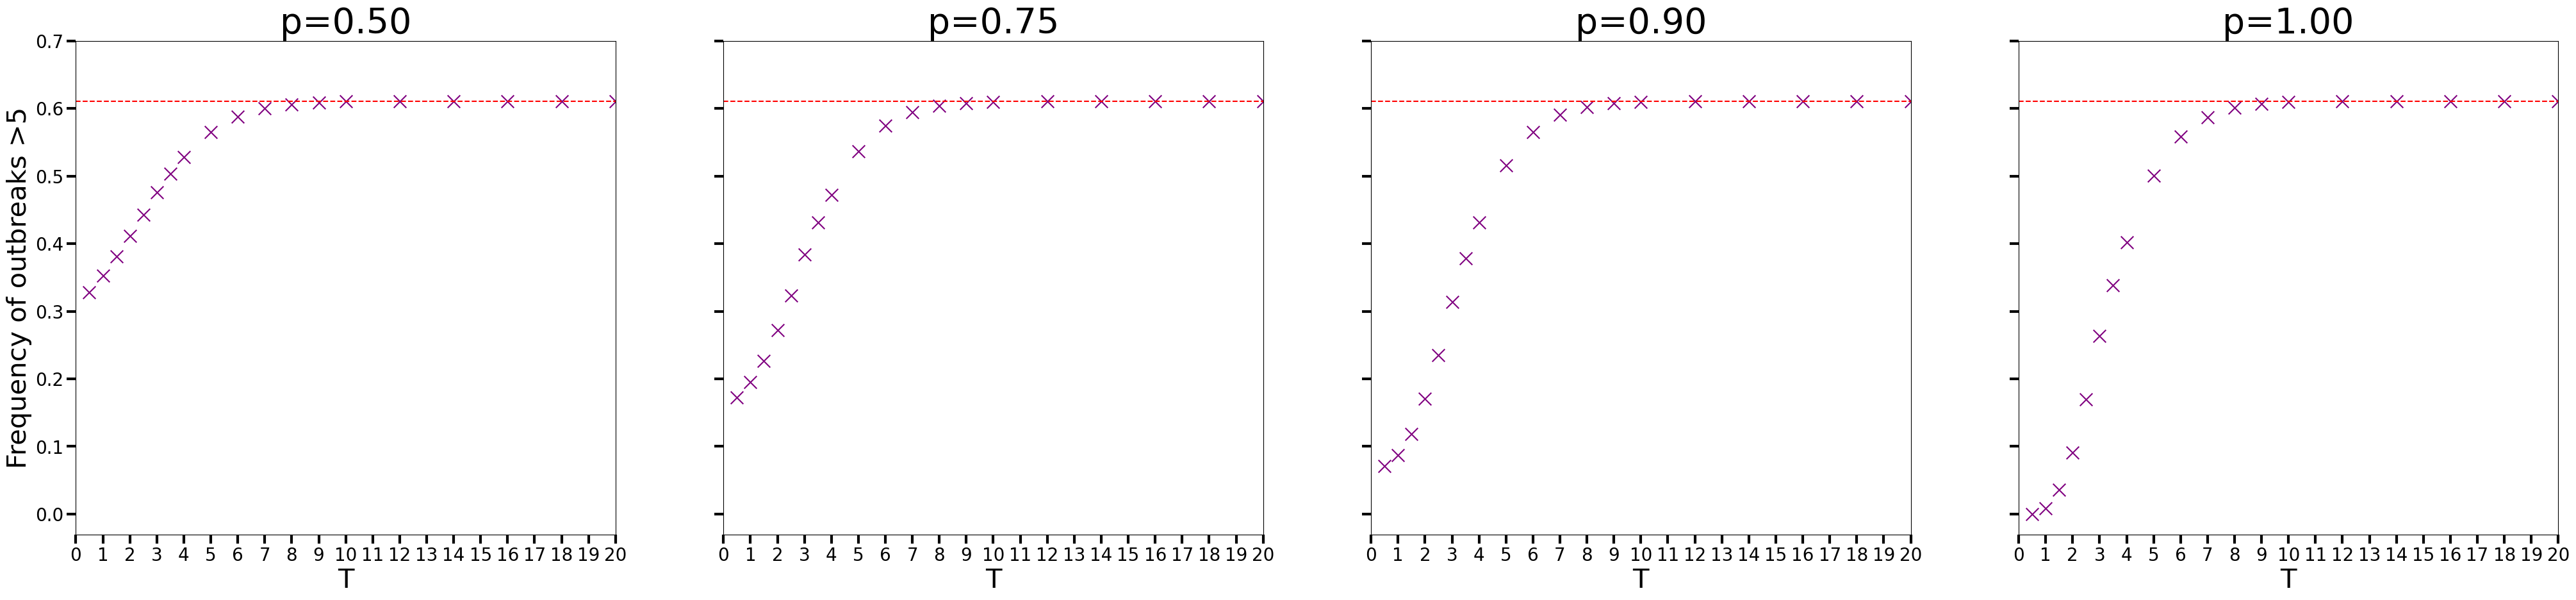

In [181]:
fig, axs = plt.subplots(1,len(p_values)-1, figsize = (50,10), sharex = True, sharey = True)
fig.suptitle('')
i = 0
for p in p_values[1:]:
    axs[i].scatter(times,prob_large[p].values(), marker = "x",s = 200, color = "purple") 
    axs[i].axhline(list(prob_large[0].values())[0], c = "r", linestyle = "--")
    axs[i].set_title("p=" + format(p,".2f"), fontsize = 40)
    axs[i].set_xlim(0,20)
    axs[i].set_xticks(np.linspace(0,20,21))
    axs[i].set_xticklabels([format(x,".0f") for x in np.linspace(0,20,21)],fontsize = 20)
    axs[i].set_yticks(np.linspace(0,0.7,8))
    axs[i].set_yticklabels([format(x,".1f") for x in np.linspace(0,0.7,8)],fontsize = 20)
    axs[i].tick_params(axis= "both", width = 3, size =10)
    axs[i].set_xlabel("T",fontsize = 30)
    i+=1

axs[0].set_ylabel("Frequency of outbreaks >5",fontsize = 30)
fig.savefig("outputs\\large_outbreak_frequency.png")